In [13]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sys
sys.path.append('../src')  # Adjust path as needed
import whistler_Arro as ww  # Import the wrapper module for WHAMP functions


# Cell 3: Load your data
filename = '/Users/u0167590/github/whamp/results/whistler_Arro.txt'
df_raw = ww.read_whamp_output_robust(filename) #ww.read_whamp_output(filename)
# Display basic info about the data
if df_raw is not None:
    print(f"Data loaded successfully!")
    print(f"Shape: {df_raw.shape}")
    print(f"\nColumn names: {list(df_raw.columns)}")
    print(f"\nUnique A values: {sorted(df_raw['A'].unique())}")
    print(f"\nUnique BETA values: {sorted(df_raw['BETA'].unique())}")
    print(f"\nFirst few rows:")
    print(df_raw.head())
    
    # Group by A value to see data structure
    print(f"\nData grouped by A value:")
    print(f" Total number of entries {len(df_raw)}, total number of omega_r > 1e3: {len(df_raw[df_raw['omega_r'] > 1e3])}")
else:
    print("Failed to load data")

Data loaded successfully!
Shape: (1090481, 18)

Column names: ['P', 'Z', 'ex_real', 'ex_imag', 'ey_real', 'ey_imag', 'ez_real', 'ez_imag', 'bx_real', 'bx_imag', 'by_real', 'by_imag', 'bz_real', 'bz_imag', 'BETA', 'A', 'omega_r', 'omega_i']

Unique A values: [np.float64(1.0), np.float64(1.1288), np.float64(1.2743), np.float64(1.4384), np.float64(1.6238), np.float64(1.833), np.float64(2.0), np.float64(2.0691), np.float64(2.3357), np.float64(2.6367), np.float64(2.9764), np.float64(3.3598), np.float64(3.7927), np.float64(4.2813), np.float64(4.8329), np.float64(5.4556), np.float64(6.1585), np.float64(6.9519), np.float64(7.8476), np.float64(8.8587), np.float64(10.0)]

Unique BETA values: [np.float64(0.0204), np.float64(0.0339), np.float64(0.0565), np.float64(0.0942), np.float64(0.157), np.float64(0.262), np.float64(0.436), np.float64(0.727), np.float64(1.21), np.float64(2.0), np.float64(2.02), np.float64(3.36), np.float64(5.61), np.float64(9.34), np.float64(15.6), np.float64(25.9), np.float6

In [14]:
df = df_raw[(df_raw['omega_r'] <= 1e1) & (df_raw['omega_r'] >= -1e1)]
len(df)

220514

In [15]:
e_complex = (df['ey_real'] + 1j * df['ey_imag'])/(df['ex_real'] + 1j * df['ex_imag'])
comparison = np.isclose(e_complex, 0.0 + 1.0j, atol=1e-8)
df = df[comparison]
len(df)

220445

In [16]:
b_complex = (df['by_real'] + 1j * df['by_imag'])/(df['bx_real'] + 1j * df['bx_imag'])
comparison = np.isclose(b_complex, 0.0 + 1.0j, atol=1e-8)
df = df[comparison]
len(df)

220439

/var/folders/2p/tg_djgcj4yl2z0f8t_5b0y6m0000gq/T/ipykernel_22423/838926161.py:64: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = axes[1, 0].scatter(subset['omega_r'], subset['omega_i'],


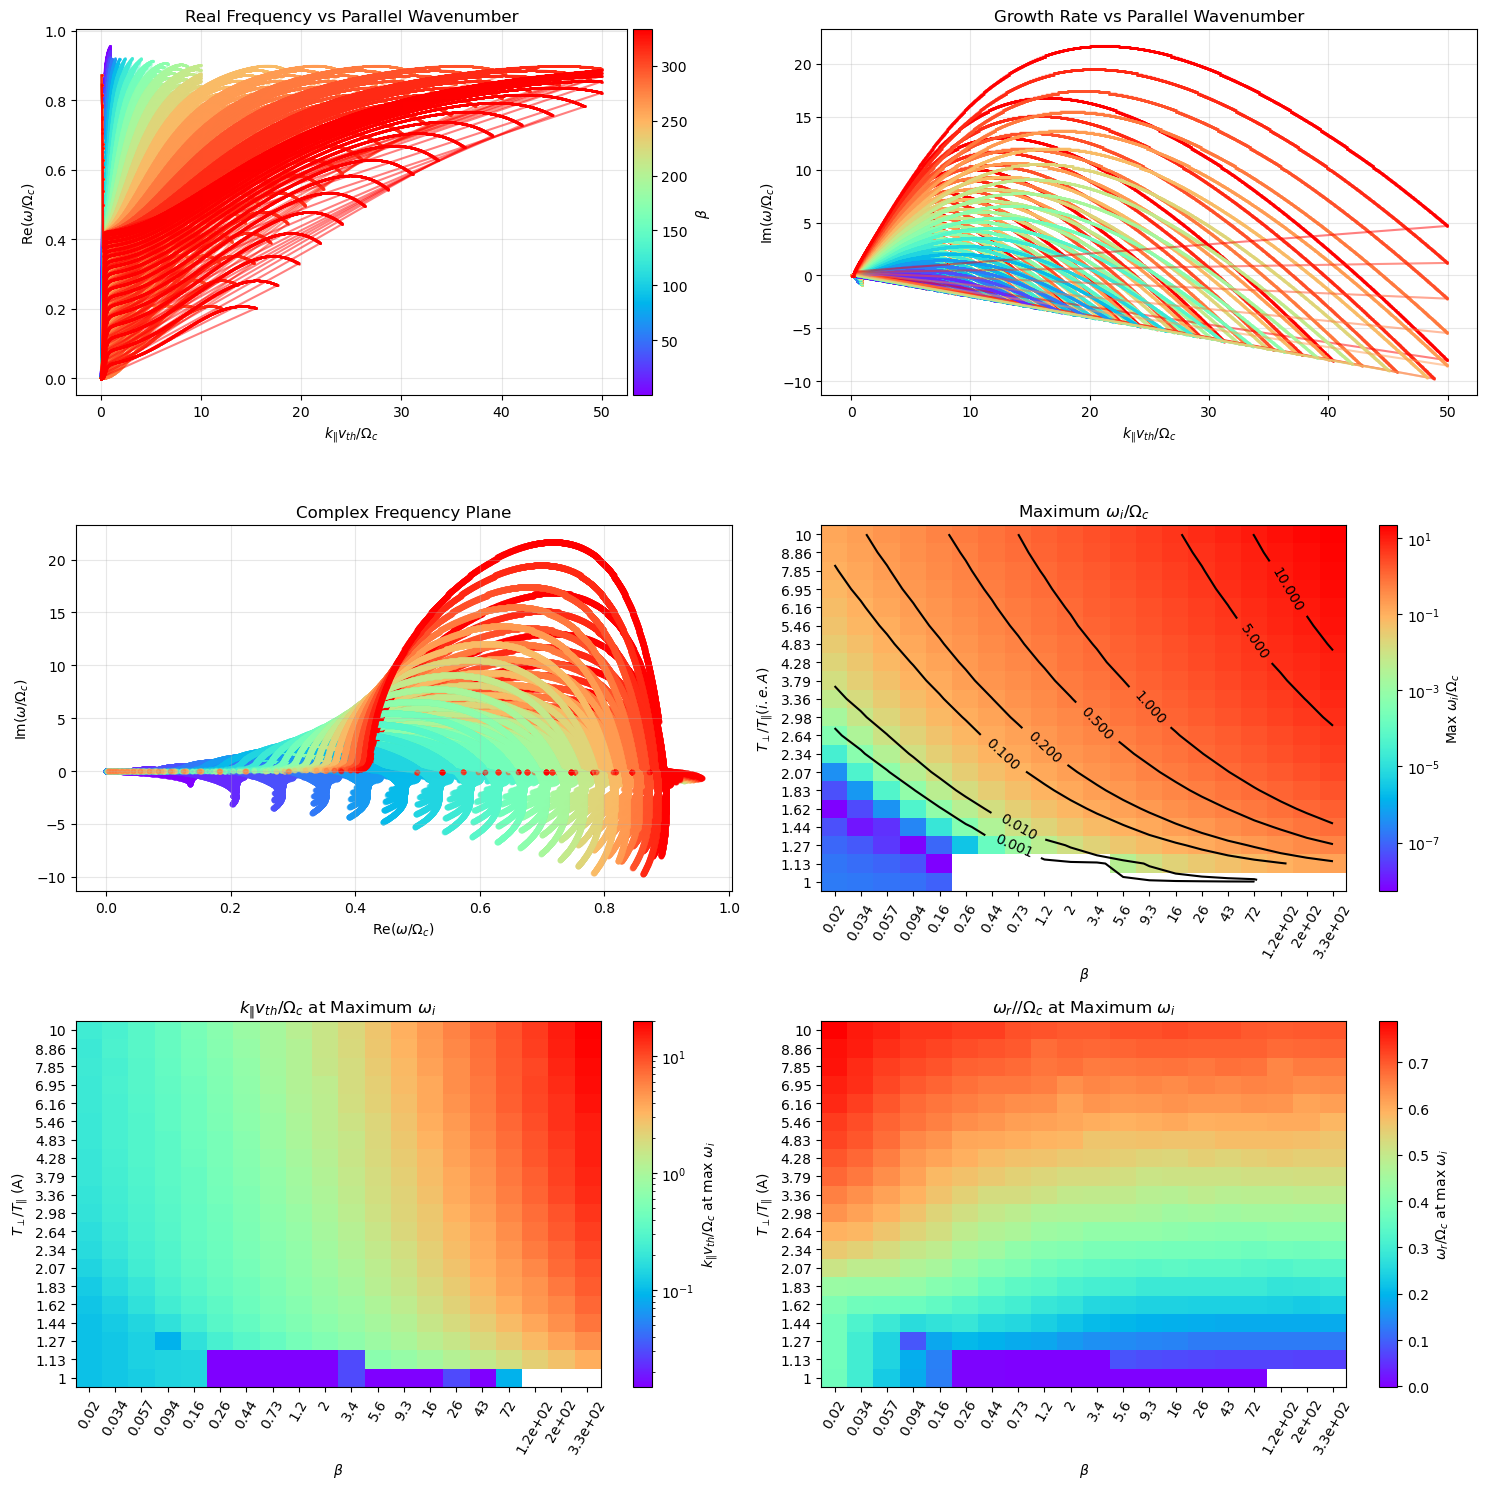

In [17]:
from matplotlib.colors import LogNorm
import numpy as np
from matplotlib.cm import ScalarMappable

# Cell 5: Advanced visualization with separate lines for each A value
if df is not None:
    # Get unique A values
    a_values = sorted(df['A'].unique())
    beta_values = sorted(df['BETA'].unique())
    import matplotlib.pyplot as plt

    # Use a colormap to span BETA values
    cmap = plt.get_cmap('rainbow')
    colors = [cmap(j / max(len(beta_values) - 1, 1)) for j in range(len(beta_values))]
    #linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':']

    fig, axes = plt.subplots(3, 2, figsize=(15, 15))

    # Plot 1: Real frequency vs z for different A values, color by BETA
    for j, beta_val in enumerate(beta_values):
        for i, a_val in enumerate(a_values):
            subset = df[(df['A'] == a_val) & (df['BETA'] == beta_val)]
            axes[0, 0].plot(subset['Z'], subset['omega_r'],
                        color=colors[j % len(colors)],
                        #linestyle=linestyles[i % len(linestyles)],
                        marker='.', markersize=2, alpha=0.5,
                        label=f'A = {a_val} & BETA = {beta_val}')
    
    axes[0, 0].set_xlabel(r'$k_\| v_{th} / \Omega_c$')
    axes[0, 0].set_ylabel(r'$\mathrm{Re}(\omega/\Omega_c)$')
    axes[0, 0].set_title('Real Frequency vs Parallel Wavenumber')
    axes[0, 0].grid(True, alpha=0.3)
    import matplotlib.lines as mlines

    # Create a ScalarMappable for the BETA colorbar
    norm = plt.Normalize(vmin=min(beta_values), vmax=max(beta_values))
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    # Add colorbar for BETA
    cbar = plt.colorbar(sm, ax=axes[0, 0], orientation='vertical', pad=0.01)
    cbar.set_label(r'$\beta$')
    #axes[0, 0].legend()
    
    # Plot 2: Imaginary frequency (growth rate) vs z for different A values
    for j, beta_val in enumerate(beta_values):
        for i, a_val in enumerate(a_values):
            subset = df[(df['A'] == a_val) & (df['BETA'] == beta_val)]
            axes[0, 1].plot(subset['Z'], subset['omega_i'], 
                        color=colors[i % len(colors)], 
                        #linestyle=linestyles[i % len(linestyles)],
                        marker='.', markersize=2, alpha=0.5,
                        label=f'A = {a_val} & BETA = {beta_val}')
    axes[0, 1].set_xlabel(r'$k_\| v_{th} / \Omega_c$')
    axes[0, 1].set_ylabel(r'$\mathrm{Im}(\omega/\Omega_c)$')
    axes[0, 1].set_title('Growth Rate vs Parallel Wavenumber')
    axes[0, 1].grid(True, alpha=0.3)
    #axes[0, 1].legend()
    
    # Plot 3: Complex frequency plane with different colors for A values
    for j, beta_val in enumerate(beta_values):
        for i, a_val in enumerate(a_values):
            subset = df[(df['A'] == a_val) & (df['BETA'] == beta_val)]
            scatter = axes[1, 0].scatter(subset['omega_r'], subset['omega_i'], 
                                    c=colors[i % len(colors)], 
                                    s=10, alpha=0.5,
                                    label=f'A = {a_val} & BETA = {beta_val}')
    
    axes[1, 0].set_xlabel(r'$\mathrm{Re}(\omega/\Omega_c)$')
    axes[1, 0].set_ylabel(r'$\mathrm{Im}(\omega/\Omega_c)$')
    axes[1, 0].set_title('Complex Frequency Plane')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Since A and BETA are not uniformly spaced, use imshow with aspect='auto' and set tick labels accordingly
    pivot = df.pivot_table(index='A', columns='BETA', values='omega_i', aggfunc='max')
    Xc, Yc = np.meshgrid(pivot.columns, pivot.index)
    

    #im = axes[1, 1].imshow(pivot, aspect='auto', origin='lower', cmap='rainbow')
    

    # Use logarithmic normalization for the colormap

    # To avoid issues with zeros or negative values, set a minimum positive value
    min_val = np.nanmin(pivot.values[pivot.values > 0])
    im = axes[1, 1].imshow(pivot, aspect='auto', origin='lower', cmap='rainbow', norm=LogNorm(vmin=min_val, vmax=np.nanmax(pivot.values)))
    # Use exponentially spaced levels for the contour (z axis exponential)
    num_levels = 20
    #min_val = np.nanmin(pivot.values[pivot.values > 0])
    #max_val = np.nanmax(pivot.values)
    #levels = np.logspace(np.log10(min_val), np.log10(max_val), num=num_levels)
    levels = np.array([0.001,0.01, 0.1, 0.2, 0.5, 1, 5, 10])  # Example levels for contour
    cp = axes[1,1].contour(pivot.values, levels=levels, colors='black')
    plt.colorbar(im, ax=axes[1, 1], label=r'Max $\omega_i/\Omega_c$')
    plt.clabel(cp, inline=True, fontsize=10, fmt="%.3f", colors='black')  # Add labels to contours in black
    # Set tick positions and labels to match the actual A and BETA values (logarithmic spacing)
    axes[1, 1].set_xticks(np.arange(len(pivot.columns)))
    axes[1, 1].set_xticklabels([f"{b:.2g}" for b in pivot.columns], rotation=60)
    axes[1, 1].set_yticks(np.arange(len(pivot.index)))
    axes[1, 1].set_yticklabels([f"{a:.3g}" for a in pivot.index])
    axes[1, 1].set_xlabel(r'$\beta$')
    axes[1, 1].set_ylabel(r'$T_\perp / T_{\|}  (i.e. A)$')
    axes[1, 1].set_title(r'Maximum $\omega_i/\Omega_c$')
    pivot.to_csv('../results/parallel_whistler.csv')
    #axes[1, 1].set_xscale('log')
    #axes[1, 1].set_yscale('log')
    #plt.xticks(pivot.columns, rotation=90)
    #plt.yticks(pivot.index)

    # Find the index of the maximum omega_i for each (A, BETA) pair
    idx = df.groupby(['A', 'BETA'])['omega_i'].idxmax()
    # Get the corresponding z values
    max_z = df.loc[idx, ['A', 'BETA', 'Z', 'omega_i']]
    # Pivot max_z to get z values for each (A, BETA)
    pivot_z = max_z.pivot(index='A', columns='BETA', values='Z')
    # Use log scale for z (pivot_z values)
    # To avoid issues with zeros or negative values, set a minimum positive value for LogNorm
    min_z = np.nanmin(pivot_z.values[pivot_z.values > 0])
    im2 = axes[2,0].imshow(pivot_z, aspect='auto', origin='lower', cmap='rainbow',
                           norm=LogNorm(vmin=min_z, vmax=np.nanmax(pivot_z.values)))
    plt.colorbar(im2, ax=axes[2,0], label=r'$k_{\|} v_{th}/\Omega_c$ at max $\omega_i$')
    axes[2,0].set_xticks(np.arange(len(pivot_z.columns)))
    axes[2,0].set_xticklabels([f"{b:.2g}" for b in pivot_z.columns], rotation=60)
    axes[2,0].set_yticks(np.arange(len(pivot_z.index)))
    axes[2,0].set_yticklabels([f"{a:.3g}" for a in pivot_z.index])
    axes[2,0].set_xlabel(r'$\beta$')
    axes[2,0].set_ylabel(r'$T_\perp / T_{\|}$ (A)')
    axes[2,0].set_title(r'$k_{\|} v_{th}/\Omega_c$ at Maximum $\omega_i$')



    # Get the corresponding z values
    max_omega_r = df.loc[idx, ['A', 'BETA', 'omega_r', 'omega_i']]

    # Pivot max_z to get z values for each (A, BETA)
    pivot_omega_r = max_omega_r.pivot(index='A', columns='BETA', values='omega_r')

    im3 = axes[2,1].imshow(pivot_omega_r, aspect='auto', origin='lower', cmap='rainbow')

    plt.colorbar(im3, ax=axes[2,1], label=r'$\omega_r/\Omega_c$ at max $\omega_i$')
    axes[2,1].set_xticks(np.arange(len(pivot_omega_r.columns)))
    axes[2,1].set_xticklabels([f"{b:.2g}" for b in pivot_omega_r.columns], rotation=60)
    axes[2,1].set_yticks(np.arange(len(pivot_omega_r.index)))
    axes[2,1].set_yticklabels([f"{a:.3g}" for a in pivot_omega_r.index])
    axes[2,1].set_xlabel(r'$\beta$')
    axes[2,1].set_ylabel(r'$T_\perp / T_{\|}$ (A)')
    axes[2,1].set_title(r'$\omega_r//\Omega_c$ at Maximum $\omega_i$')
    
    plt.tight_layout()
    plt.show()

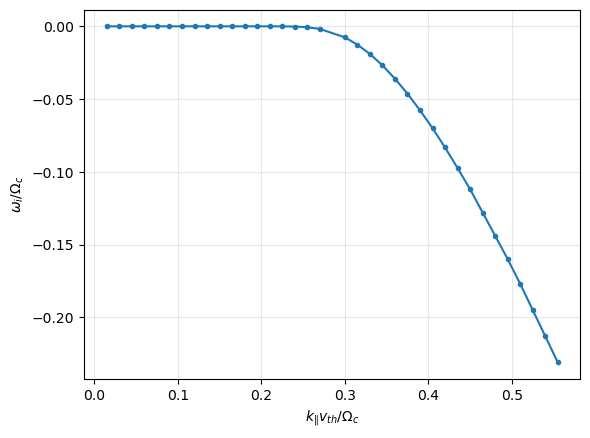

In [9]:
subset = df[(df['BETA'] == 0.1260) & (df['A'] == 1.1288)].sort_values(by='Z')
plt.plot(subset['Z'], subset['omega_i'], marker='.')
plt.xlabel(r'$k_\| v_{th} / \Omega_c$')
plt.ylabel(r'$\omega_i/\Omega_c$')
plt.grid(True, alpha=0.3)
plt.show()